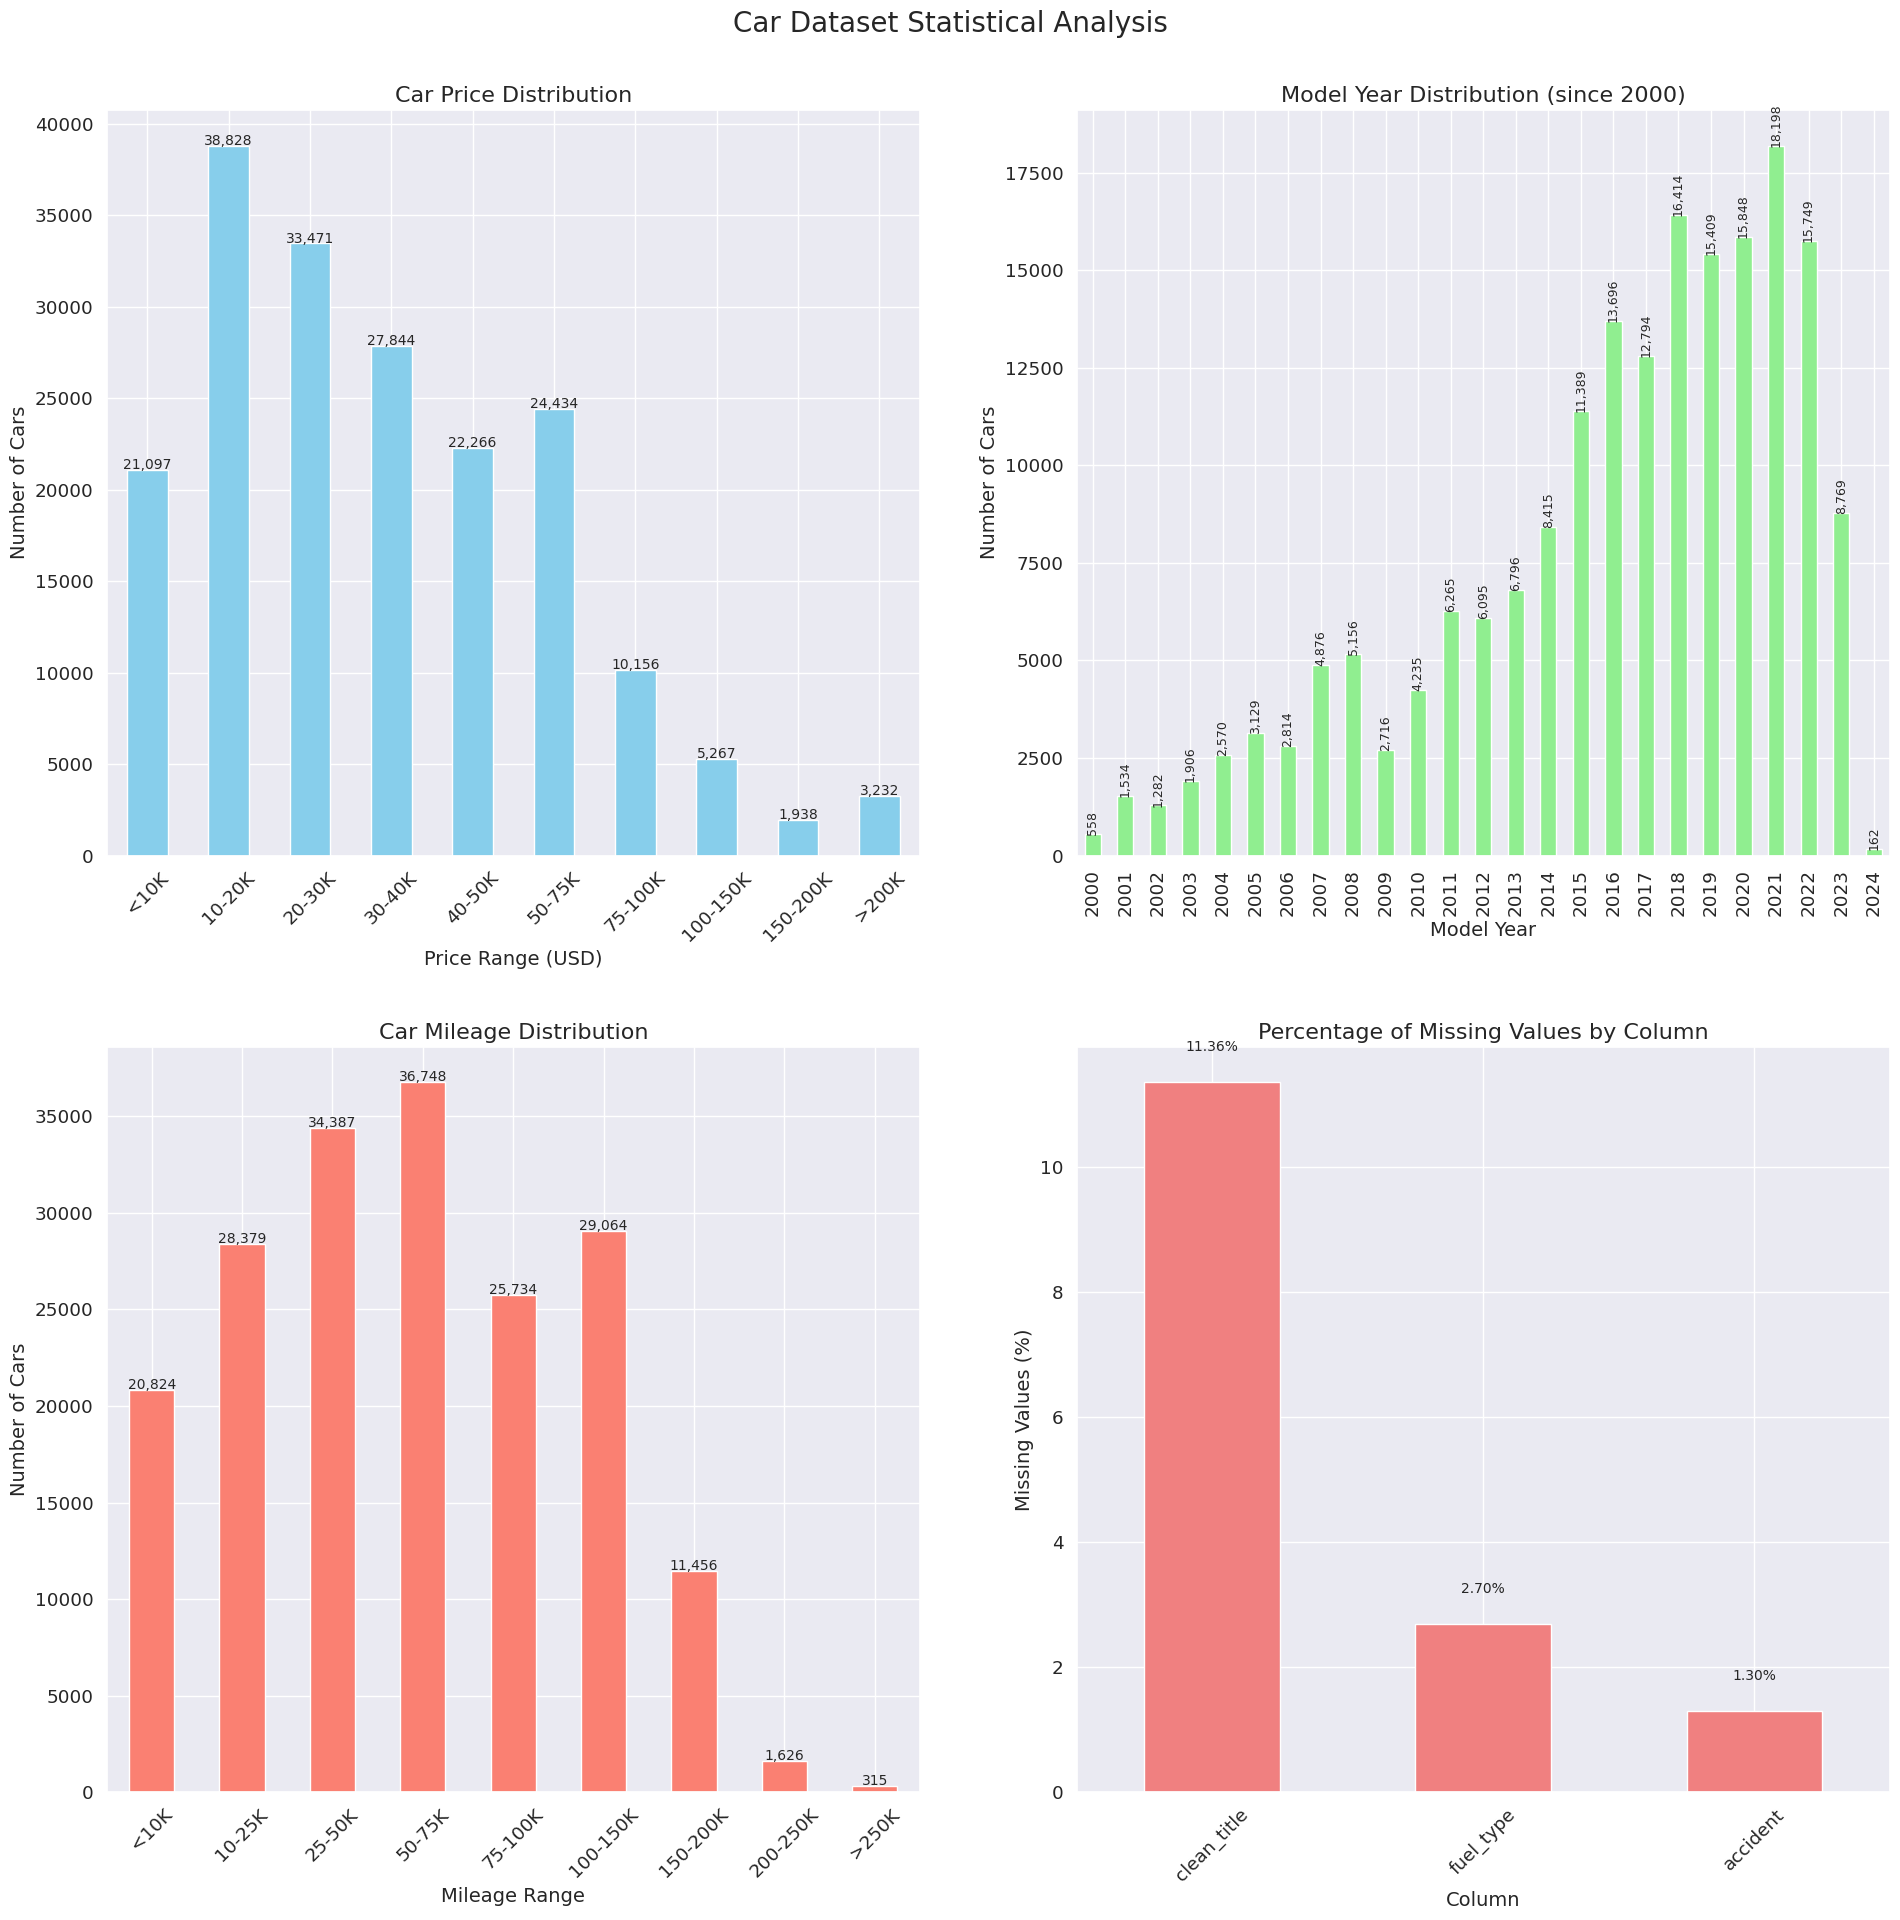


Dataset Summary:
Total number of cars: 188,533
Price range: $2,000 to $2,954,083
Average price: $43878.02
Model years range: 1974 to 2024
Average mileage: 65705.30 miles

Missing Values Summary:
fuel_type: 5,083 missing values (2.70%)
accident: 2,452 missing values (1.30%)
clean_title: 21,419 missing values (11.36%)


In [5]:
# Basic statistical analysis
# In order to deal with the problem of incompatibility with the local environment, it is recommended to run it on Google Colab.
# Make sure to upload the train.csv file before running any code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Create a figure with subplots
fig = plt.figure(figsize=(20, 20))

# 1. Price Distribution
plt.subplot(2, 2, 1)
# Bin prices into ranges for better visualization (most cars will be in lower price range)
price_bins = [0, 10000, 20000, 30000, 40000, 50000, 75000, 100000, 150000, 200000, np.inf]
price_labels = ['<10K', '10-20K', '20-30K', '30-40K', '40-50K', '50-75K', '75-100K', '100-150K', '150-200K', '>200K']
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Count and plot
price_counts = df['price_range'].value_counts().sort_index()
ax = price_counts.plot(kind='bar', color='skyblue')
plt.title('Car Price Distribution', fontsize=16)
plt.xlabel('Price Range (USD)', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, count in enumerate(price_counts):
    plt.text(i, count + 50, f'{count:,}', ha='center', fontsize=10)

# 2. Model Year Distribution
plt.subplot(2, 2, 2)
# Group by year, counting how many cars per year
year_counts = df['model_year'].value_counts().sort_index()
# Filter to recent years (last 25 years) for better visualization
recent_years = year_counts[year_counts.index >= 2000]
ax = recent_years.plot(kind='bar', color='lightgreen')
plt.title('Model Year Distribution (since 2000)', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=90)

# Add count labels on top of bars
for i, count in enumerate(recent_years):
    plt.text(i, count + 50, f'{count:,}', ha='center', fontsize=9, rotation=90)

# 3. Mileage Distribution
plt.subplot(2, 2, 3)
# Create mileage bins
mileage_bins = [0, 10000, 25000, 50000, 75000, 100000, 150000, 200000, 250000, np.inf]
mileage_labels = ['<10K', '10-25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-200K', '200-250K', '>250K']
df['mileage_range'] = pd.cut(df['milage'], bins=mileage_bins, labels=mileage_labels)

# Count and plot
mileage_counts = df['mileage_range'].value_counts().sort_index()
ax = mileage_counts.plot(kind='bar', color='salmon')
plt.title('Car Mileage Distribution', fontsize=16)
plt.xlabel('Mileage Range', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, count in enumerate(mileage_counts):
    plt.text(i, count + 50, f'{count:,}', ha='center', fontsize=10)

# 4. Missing Values Analysis
plt.subplot(2, 2, 4)
# Calculate percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
# Filter out columns with no missing values
missing_percentages = missing_percentages[missing_percentages > 0]

if len(missing_percentages) > 0:
    ax = missing_percentages.plot(kind='bar', color='lightcoral')
    plt.title('Percentage of Missing Values by Column', fontsize=16)
    plt.xlabel('Column', fontsize=14)
    plt.ylabel('Missing Values (%)', fontsize=14)
    plt.xticks(rotation=45)

    # Add percentage labels on top of bars
    for i, percentage in enumerate(missing_percentages):
        plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', fontsize=10)
else:
    plt.text(0.5, 0.5, 'No missing values found in the dataset',
             horizontalalignment='center', verticalalignment='center', fontsize=14)

# Adjust layout and spacing
plt.tight_layout(pad=3.0)
plt.suptitle('Car Dataset Statistical Analysis', fontsize=20, y=0.98)
plt.subplots_adjust(top=0.93)

# Show plot
plt.show()

# Additional summary statistics
print("\nDataset Summary:")
print(f"Total number of cars: {len(df):,}")
print(f"Price range: ${df['price'].min():,} to ${df['price'].max():,}")
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Model years range: {df['model_year'].min()} to {df['model_year'].max()}")
print(f"Average mileage: {df['milage'].mean():.2f} miles")

# Missing values summary
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
if len(missing_cols) > 0:
    print("\nMissing Values Summary:")
    for col, count in missing_cols.items():
        print(f"{col}: {count:,} missing values ({count/len(df)*100:.2f}%)")
else:
    print("\nNo missing values in the dataset.")

Loading the dataset...
Dataset loaded with 188533 rows and 13 columns

First few rows of the dataset:


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500




# Average Price by Car Brand Analysis
-------------------------------------


<ipython-input-6-f3fc94a2ec46>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='avg_price', y='brand', data=top_20_brands, palette='viridis')


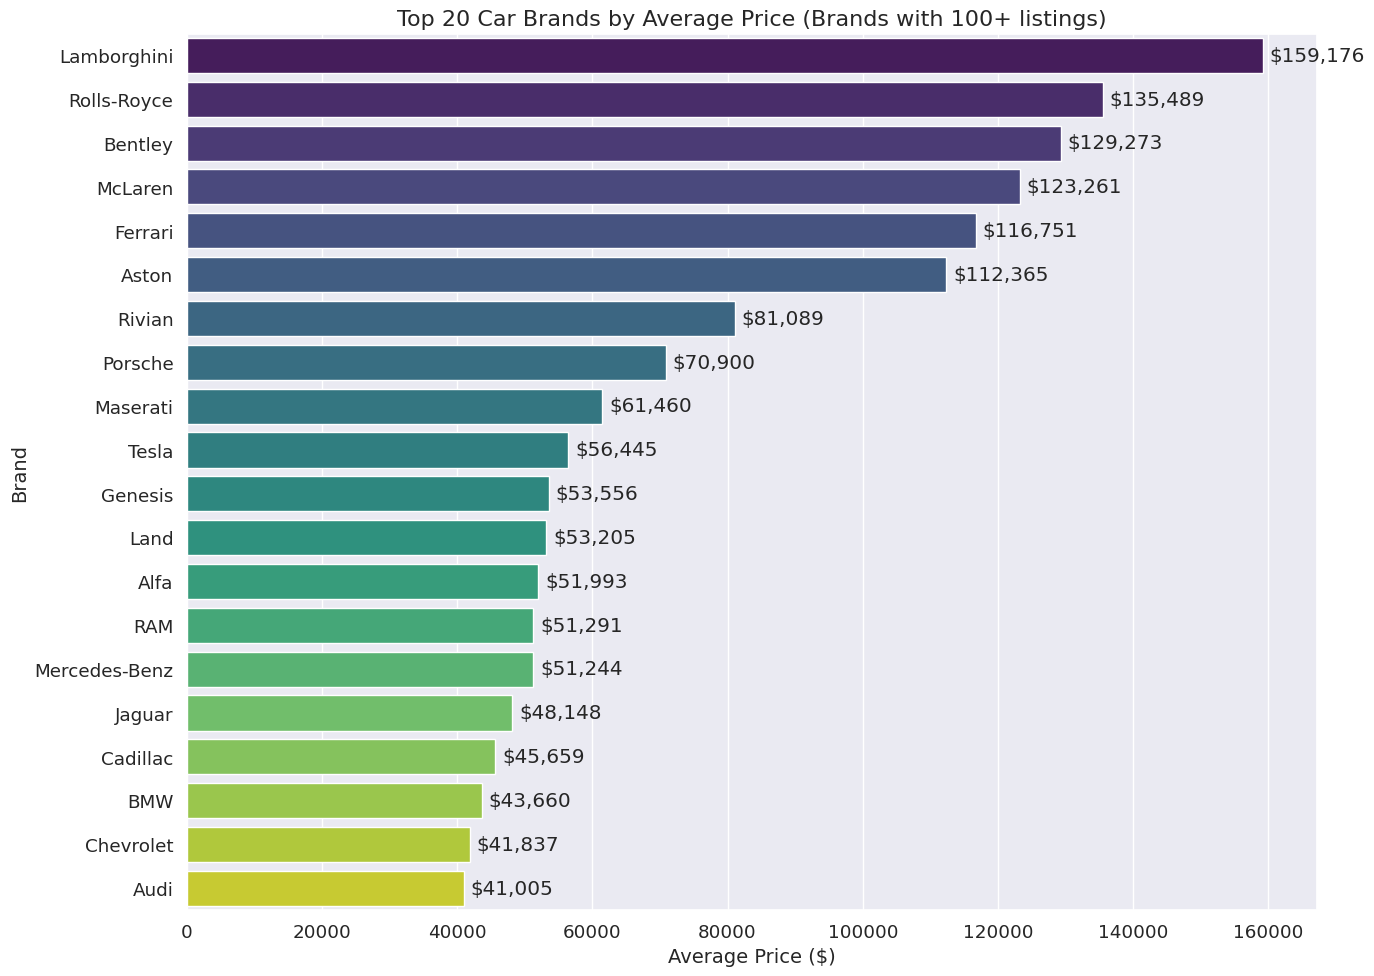



# Correlation Matrix Analysis
--------------------------


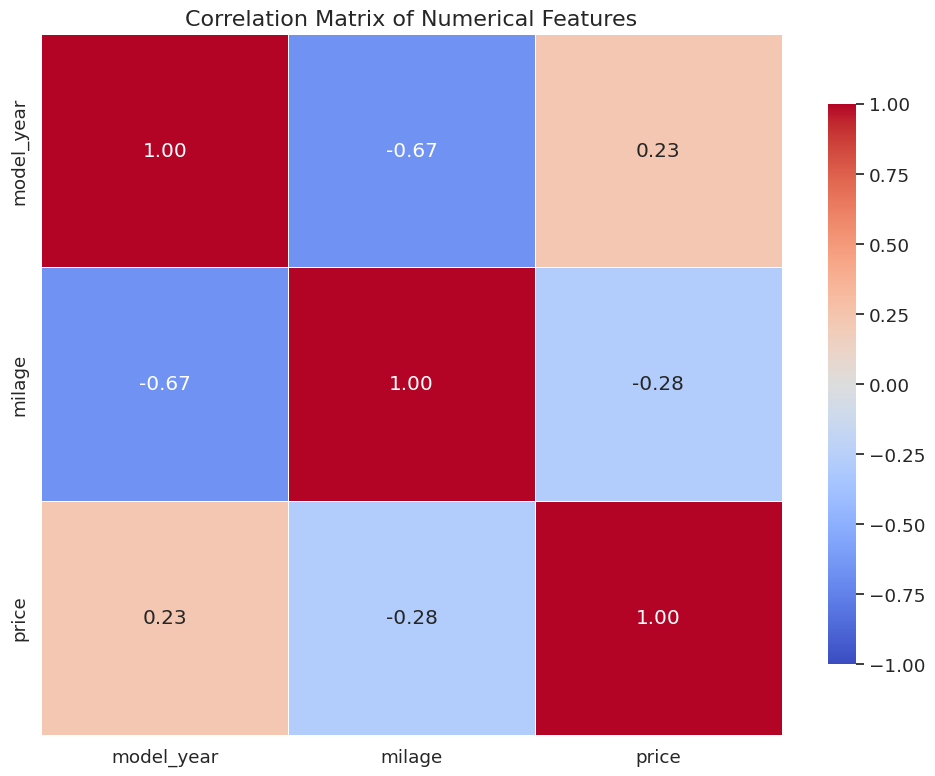

Correlation Analysis:
- model_year has a weak positive correlation (0.23) with price.
- milage has a weak negative correlation (-0.28) with price.


# Price vs. Mileage Relationship
-----------------------------
Using a random sample of 10000 cars for the scatter plot.


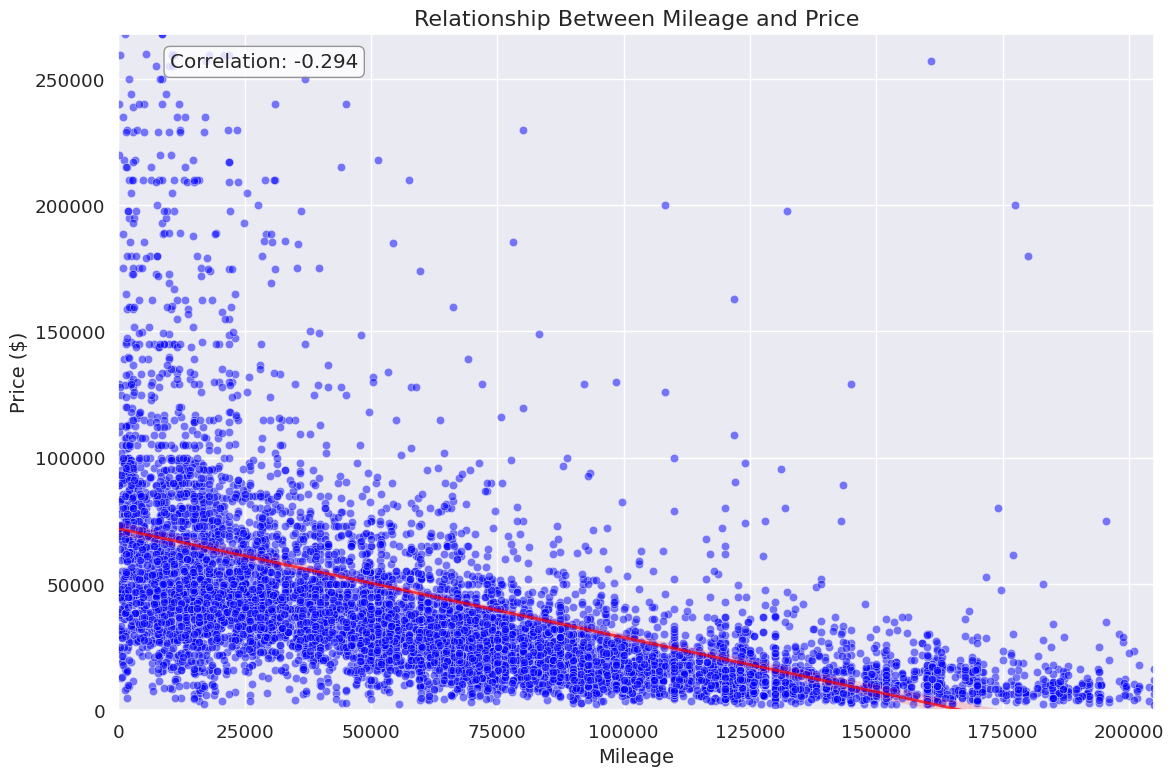



# Price by Accident History Analysis
----------------------------------


<ipython-input-6-f3fc94a2ec46>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df['accident_status'] = accident_df['accident'].map(accident_mapping)
<ipython-input-6-f3fc94a2ec46>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='accident_status', y='price', data=accident_df, palette='Set2')


T-test results: t=73.63, p=0.000000
The price difference between cars with and without accidents is statistically significant.
Cars without accidents are on average $23690.73 more expensive (93.5% higher) than cars with reported accidents.


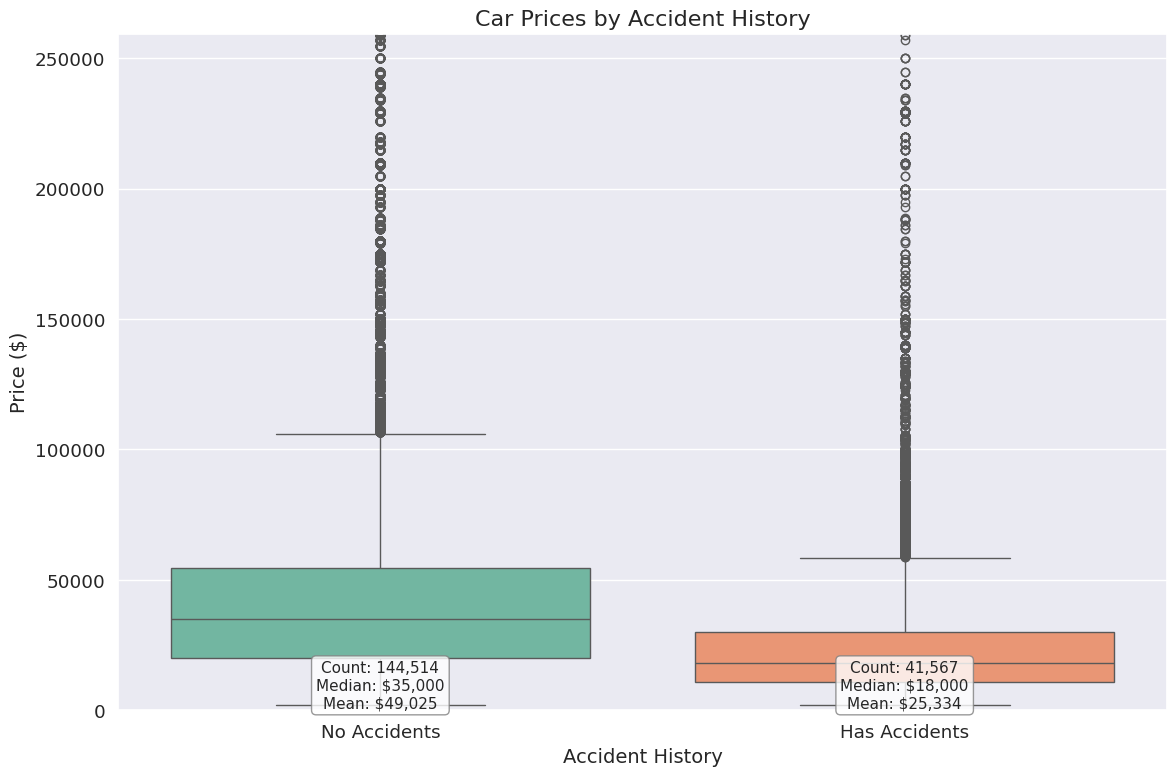



# Bonus Analysis: Brand Market Share & Model Year Trends
----------------------------------------------------


<ipython-input-6-f3fc94a2ec46>:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')


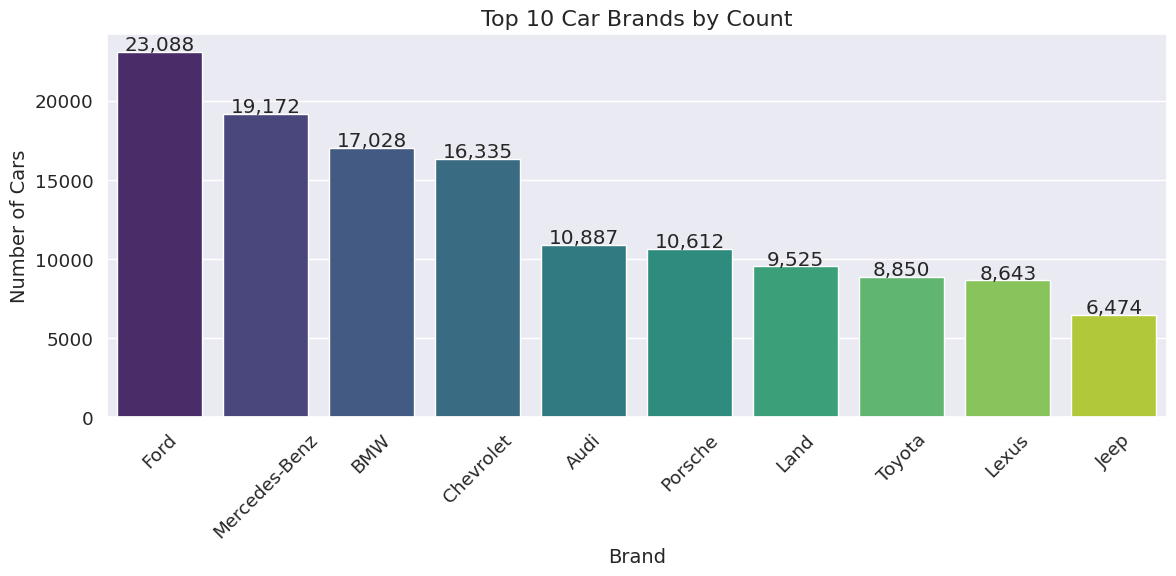

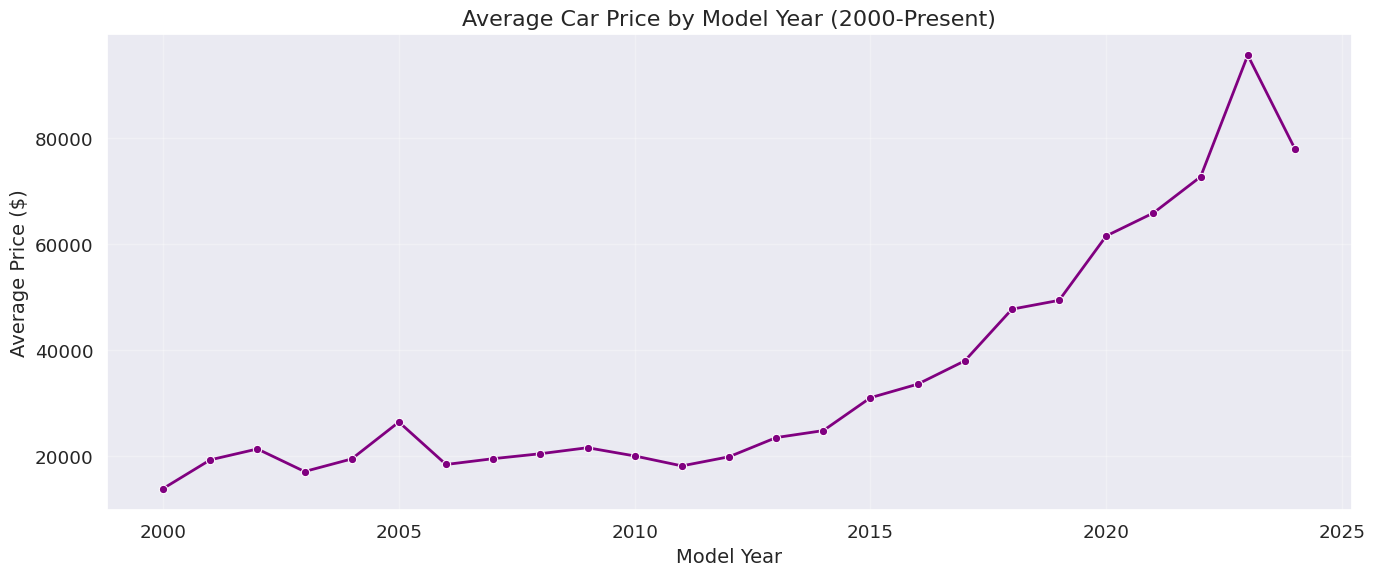


Advanced Analysis Complete!


In [6]:
# Advanced Car Data Visualization & Relationships
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set styling for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
print("Loading the dataset...")
df = pd.read_csv('/content/train.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

# Quick look at the data
print("\nFirst few rows of the dataset:")
display(df.head())

# Converting categorical variables to proper format
# Converting the accident column to a categorical type for better analysis
df['accident_status'] = df['accident'].fillna('Information not available')

# 1. Average Price by Car Brand
print("\n\n# Average Price by Car Brand Analysis")
print("-------------------------------------")

# Calculate average price by brand
brand_avg_price = df.groupby('brand')['price'].agg(['mean', 'count']).reset_index()
brand_avg_price.columns = ['brand', 'avg_price', 'count']

# Filter brands with at least 100 cars to get more reliable averages
brand_avg_price_filtered = brand_avg_price[brand_avg_price['count'] >= 100]

# Sort by average price and take top 20
top_20_brands = brand_avg_price_filtered.sort_values('avg_price', ascending=False).head(20)

# Create the plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='avg_price', y='brand', data=top_20_brands, palette='viridis')
plt.title('Top 20 Car Brands by Average Price', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Add price labels on the bars
for i, price in enumerate(top_20_brands['avg_price']):
    ax.text(price + 1000, i, f"${price:,.0f}", va='center')

# Instead of adding count labels next to brand names, add them to the title
plt.title('Top 20 Car Brands by Average Price (Brands with 100+ listings)', fontsize=16)

plt.tight_layout()
plt.show()

# 2. Correlation Matrix for Numerical Features
print("\n\n# Correlation Matrix Analysis")
print("--------------------------")

# Select numerical columns
numerical_cols = ['model_year', 'milage', 'price']
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Print correlation analysis explanation
print("Correlation Analysis:")
for col in ['model_year', 'milage']:
    corr_val = corr_matrix.loc[col, 'price']
    direction = "positive" if corr_val > 0 else "negative"
    strength = "strong" if abs(corr_val) > 0.5 else "moderate" if abs(corr_val) > 0.3 else "weak"
    print(f"- {col} has a {strength} {direction} correlation ({corr_val:.2f}) with price.")

# 3. Price vs. Mileage Scatter Plot with Regression Line
print("\n\n# Price vs. Mileage Relationship")
print("-----------------------------")

# Create a sample if the dataset is too large (for better visualization)
if len(df) > 10000:
    sample_size = 10000
    sample_df = df.sample(sample_size, random_state=42)
    print(f"Using a random sample of {sample_size} cars for the scatter plot.")
else:
    sample_df = df
    print(f"Using all {len(df)} cars for the scatter plot.")

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='milage', y='price', data=sample_df, alpha=0.5, color='blue')

# Add regression line
sns.regplot(x='milage', y='price', data=sample_df, scatter=False,
            line_kws={"color": "red", "alpha": 0.7, "lw": 2})

# Improve the plot
plt.title('Relationship Between Mileage and Price', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xlim(0, sample_df['milage'].quantile(0.99))  # Limit x-axis to exclude extreme outliers
plt.ylim(0, sample_df['price'].quantile(0.99))   # Limit y-axis to exclude extreme outliers

# Calculate the correlation and print it on the plot
corr_val = sample_df[['milage', 'price']].corr().iloc[0, 1]
plt.annotate(f'Correlation: {corr_val:.3f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# 4. Price by Accident History
print("\n\n# Price by Accident History Analysis")
print("----------------------------------")

# Filter out missing accident data if any
accident_df = df.dropna(subset=['accident'])

# Map accident values to more readable labels
accident_mapping = {
    'None reported': 'No Accidents',
    'At least 1 accident or damage reported': 'Has Accidents',
}

# Create a new column with mapped values
accident_df['accident_status'] = accident_df['accident'].map(accident_mapping)

# Create the box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='accident_status', y='price', data=accident_df, palette='Set2')
plt.title('Car Prices by Accident History', fontsize=16)
plt.xlabel('Accident History', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Calculate and display statistics
for i, accident_type in enumerate(accident_df['accident_status'].unique()):
    subset = accident_df[accident_df['accident_status'] == accident_type]
    median_price = subset['price'].median()
    mean_price = subset['price'].mean()
    count = len(subset)

    # Add statistics as text
    plt.text(i, 0,
             f"Count: {count:,}\nMedian: ${median_price:,.0f}\nMean: ${mean_price:,.0f}",
             ha='center', va='bottom', fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Limit y-axis to exclude extreme outliers
plt.ylim(0, accident_df['price'].quantile(0.99))

# Perform t-test to check if the difference is statistically significant
no_accident = accident_df[accident_df['accident_status'] == 'No Accidents']['price']
has_accident = accident_df[accident_df['accident_status'] == 'Has Accidents']['price']

t_stat, p_val = stats.ttest_ind(no_accident, has_accident, equal_var=False)
significance = "statistically significant" if p_val < 0.05 else "not statistically significant"

print(f"T-test results: t={t_stat:.2f}, p={p_val:.6f}")
print(f"The price difference between cars with and without accidents is {significance}.")

if p_val < 0.05:
    price_diff = no_accident.mean() - has_accident.mean()
    price_diff_percent = (price_diff / has_accident.mean()) * 100
    print(f"Cars without accidents are on average ${price_diff:.2f} more expensive " +
          f"({price_diff_percent:.1f}% higher) than cars with reported accidents.")

plt.tight_layout()
plt.show()

# Additional Analysis: Brand & Model Year Distribution
print("\n\n# Bonus Analysis: Brand Market Share & Model Year Trends")
print("----------------------------------------------------")

# Top 10 brands by count
top_10_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')
plt.title('Top 10 Car Brands by Count', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)

# Add count labels on the bars
for i, count in enumerate(top_10_brands):
    ax.text(i, count + 100, f"{count:,}", ha='center')

plt.tight_layout()
plt.show()

# Average price by model year (for recent years)
recent_years_df = df[df['model_year'] >= 2000]
year_price = recent_years_df.groupby('model_year')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='model_year', y='price', data=year_price, marker='o', color='purple', linewidth=2)
plt.title('Average Car Price by Model Year (2000-Present)', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAdvanced Analysis Complete!")

In [3]:
# Car Price Prediction Models for All-Range Vehicles: Ridge Regression & XGBoost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import time
import re

# Set random seed for reproducibility
np.random.seed(42)

print("Loading dataset...")
train_df = pd.read_csv('/content/train.csv')

print(f"Dataset: {train_df.shape[0]} rows, {train_df.shape[1]} columns")

# Define price limits - exclude extreme outliers
lower_price = train_df['price'].quantile(0.001)
upper_price = train_df['price'].quantile(0.999)
print(f"Price range: ${lower_price:.2f} to ${upper_price:.2f}")

# Filter out extreme price outliers
train_df_filtered = train_df[(train_df['price'] >= lower_price) &
                            (train_df['price'] <= upper_price)]
print(f"Removed {len(train_df) - len(train_df_filtered)} extreme price outliers")
train_df = train_df_filtered

# Data Preprocessing Function
def preprocess_data(df):
    """Comprehensive preprocessing for car data"""
    # Make a copy to avoid modifying the original
    df_copy = df.copy()

    # Check data types
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            df_copy[col] = df_copy[col].astype(str)

    # Handle missing values for key columns
    df_copy['fuel_type'] = df_copy['fuel_type'].fillna('Unknown')
    df_copy['accident'] = df_copy['accident'].fillna('Unknown')
    df_copy['clean_title'] = df_copy['clean_title'].fillna('Unknown')

    # Create age feature (current year - model_year)
    current_year = 2025  # Assuming current year is 2025
    df_copy['car_age'] = current_year - df_copy['model_year']

    # Car age squared (to capture non-linear depreciation)
    df_copy['car_age_squared'] = df_copy['car_age'] ** 2

    # Mileage features
    df_copy['mileage_per_year'] = df_copy['milage'] / df_copy['car_age']
    # Replace infinity values with median
    median_mileage_per_year = df_copy['mileage_per_year'].replace([np.inf, -np.inf], np.nan).median()
    df_copy['mileage_per_year'] = df_copy['mileage_per_year'].replace([np.inf, -np.inf], median_mileage_per_year)

    # Log transform of mileage (to reduce skewness)
    df_copy['log_mileage'] = np.log1p(df_copy['milage'])

    # Extract horsepower from engine description when available
    def extract_hp(engine_desc):
        if isinstance(engine_desc, str) and 'HP' in engine_desc:
            try:
                hp_pattern = r'(\d+\.?\d*)HP'
                match = re.search(hp_pattern, engine_desc)
                if match:
                    return float(match.group(1))
                return np.nan
            except:
                return np.nan
        return np.nan

    df_copy['horsepower'] = df_copy['engine'].apply(extract_hp)

    # Extract engine displacement from engine description when available
    def extract_displacement(engine_desc):
        if isinstance(engine_desc, str) and 'L' in engine_desc:
            try:
                displacement_pattern = r'(\d+\.?\d*)L'
                match = re.search(displacement_pattern, engine_desc)
                if match:
                    return float(match.group(1))
                return np.nan
            except:
                return np.nan
        return np.nan

    df_copy['engine_displacement'] = df_copy['engine'].apply(extract_displacement)

    # Extract number of cylinders from engine description when available
    def extract_cylinders(engine_desc):
        if isinstance(engine_desc, str) and 'Cylinder' in engine_desc:
            try:
                cylinder_pattern = r'(\d+)\s*Cylinder'
                match = re.search(cylinder_pattern, engine_desc)
                if match:
                    return int(match.group(1))
                return np.nan
            except:
                return np.nan
        return np.nan

    df_copy['cylinders'] = df_copy['engine'].apply(extract_cylinders)

    # Horsepower per liter (power density)
    df_copy['power_density'] = df_copy['horsepower'] / df_copy['engine_displacement']
    # Replace infinity values with median
    median_power_density = df_copy['power_density'].replace([np.inf, -np.inf], np.nan).median()
    df_copy['power_density'] = df_copy['power_density'].replace([np.inf, -np.inf], median_power_density)

    # Create binary features for accident and clean title
    df_copy['has_accident'] = df_copy['accident'].apply(
        lambda x: 0 if x == 'None reported' else 1 if x == 'At least 1 accident or damage reported' else 0.5
    )

    df_copy['is_clean_title'] = df_copy['clean_title'].apply(
        lambda x: 1 if x == 'Yes' else 0
    )

    # Create brand luxury flag based on known luxury brands
    luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Tesla',
                     'Jaguar', 'Land Rover', 'Maserati', 'Ferrari', 'Lamborghini',
                     'Bentley', 'Rolls-Royce', 'Aston Martin', 'Genesis', 'Alfa Romeo',
                     'Infiniti', 'Acura', 'Cadillac', 'Lincoln']

    df_copy['is_luxury'] = df_copy['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

    # Create brand categories (group less frequent brands)
    brand_counts = df_copy['brand'].value_counts()
    common_brands = brand_counts[brand_counts >= 500].index.tolist()

    df_copy['brand_category'] = df_copy['brand'].apply(
        lambda x: x if x in common_brands else 'Other'
    )

    # Create transmission type categories
    df_copy['is_automatic'] = df_copy['transmission'].apply(
        lambda x: 1 if 'A/T' in x or 'Automatic' in x or 'CVT' in x else 0
    )

    # Simplify fuel types
    def simplify_fuel(fuel):
        if pd.isna(fuel) or fuel == 'Unknown':
            return 'Other'
        elif 'Gasoline' in fuel:
            return 'Gasoline'
        elif 'Hybrid' in fuel:
            return 'Hybrid'
        elif 'Diesel' in fuel:
            return 'Diesel'
        elif 'Electric' in fuel:
            return 'Electric'
        elif 'Flex' in fuel:
            return 'Flex Fuel'
        else:
            return 'Other'

    df_copy['fuel_type_simple'] = df_copy['fuel_type'].apply(simplify_fuel)

    # Simplify exterior colors
    def simplify_color(color):
        if pd.isna(color):
            return 'Other'
        color = color.lower()
        if color in ['black', 'white', 'gray', 'silver', 'blue', 'red', 'green', 'brown', 'yellow', 'orange']:
            return color.capitalize()
        else:
            return 'Other'

    df_copy['ext_col_simple'] = df_copy['ext_col'].apply(simplify_color)
    df_copy['int_col_simple'] = df_copy['int_col'].apply(simplify_color)

    # Interaction features
    df_copy['luxury_no_accident'] = df_copy['is_luxury'] * (1 - df_copy['has_accident'])
    df_copy['age_luxury'] = df_copy['car_age'] * df_copy['is_luxury']

    # Popular car models feature
    model_counts = df_copy['model'].value_counts()
    popular_models = model_counts[model_counts >= 100].index.tolist()

    df_copy['is_popular_model'] = df_copy['model'].apply(
        lambda x: 1 if x in popular_models else 0
    )

    # Engine power categories
    def power_category(hp):
        if pd.isna(hp):
            return 'Unknown'
        elif hp < 150:
            return 'Low'
        elif hp < 250:
            return 'Medium'
        elif hp < 350:
            return 'High'
        else:
            return 'Very High'

    df_copy['power_category'] = df_copy['horsepower'].apply(power_category)

    # Return the processed dataframe
    return df_copy

# Apply preprocessing
print("\nData preprocessing...")
train_processed = preprocess_data(train_df)

# Check for columns with high correlation to price
print("\nCalculating feature correlations with price...")
numerical_df = train_processed.select_dtypes(include=[np.number])
correlations = numerical_df.corr()['price'].sort_values(ascending=False)

# Display top 10 numerical features correlated with price
print("\nTop 10 numerical features correlated with vehicle price:")
print("-" * 50)
for i, (feature, correlation) in enumerate(correlations.head(11).items()):
    if feature != 'price':  # Skip the price correlation with itself
        print(f"{i}. {feature:<20} {correlation:>10.4f}")

# Define features and target
target = 'price'

# Use most informative features
numeric_features = [
    'horsepower', 'engine_displacement', 'cylinders', 'car_age', 'milage',
    'log_mileage', 'is_luxury', 'is_clean_title', 'has_accident',
    'is_automatic', 'is_popular_model', 'car_age_squared', 'power_density',
    'mileage_per_year', 'luxury_no_accident', 'age_luxury'
]

categorical_features = [
    'brand_category', 'fuel_type_simple', 'power_category',
    'ext_col_simple', 'int_col_simple'
]

print(f"\nFeature set:")
print(f"Numeric features: {len(numeric_features)} features")
print(f"Categorical features: {len(categorical_features)} features")

# Separate features and target
X = train_processed[numeric_features + categorical_features]
y = train_processed[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nSplit data into training (80%) and validation (20%) sets")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_test.shape[0]} samples")

# Feature Engineering Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define evaluation function
def evaluate_model(model, X, y, model_name):
    """Evaluate model and return metrics"""
    y_pred = model.predict(X)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"R² Score: {r2:.4f}")

    return {
        'model_name': model_name,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

# 1. Ridge Regression Model
print("\n\n" + "="*50)
print("Building Ridge Regression Model...")
print("="*50)

start_time = time.time()

# Ridge with polynomial features
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('regressor', Ridge(alpha=10.0))
])

# Train the model
ridge_pipeline.fit(X_train, y_train)
ridge_train_time = time.time() - start_time
print(f"Ridge Regression training completed in {ridge_train_time:.2f} seconds")

# Evaluate on validation data
ridge_metrics = evaluate_model(ridge_pipeline, X_test, y_test, "Ridge Regression")

# 2. XGBoost Model
print("\n\n" + "="*50)
print("Building XGBoost Model...")
print("="*50)

start_time = time.time()

# Create the pipeline with tuned hyperparameters
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=8,
        min_child_weight=2,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        reg_alpha=0.1,
        reg_lambda=1.0,
        objective='reg:squarederror',
        tree_method='hist',  # faster algorithm
        random_state=42))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)
xgb_train_time = time.time() - start_time
print(f"XGBoost training completed in {xgb_train_time:.2f} seconds")

# Evaluate on validation data
xgb_metrics = evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost")

# Model Summary
print("\n" + "="*50)
print("Model Comparison Summary")
print("="*50)
print(f"{'Model':<20} {'RMSE ($)':<15} {'MAE ($)':<15} {'R² Score':<10}")
print(f"{'-'*60}")
models = [ridge_metrics, xgb_metrics]
for model in models:
    print(f"{model['model_name']:<20} ${model['rmse']:,.2f} ${model['mae']:,.2f} {model['r2']:.4f}")

# Determine the best model
best_model = min(models, key=lambda x: x['rmse'])
difference = abs(ridge_metrics['rmse'] - xgb_metrics['rmse']) / max(ridge_metrics['rmse'], xgb_metrics['rmse']) * 100


Loading dataset...
Dataset: 188533 rows, 13 columns
Price range: $2500.00 to $749950.00
Removed 277 extreme price outliers

Data preprocessing...

Calculating feature correlations with price...

Top 10 numerical features correlated with vehicle price:
--------------------------------------------------
1. horsepower               0.4068
2. model_year               0.3760
3. power_density            0.2733
4. luxury_no_accident       0.1830
5. cylinders                0.1811
6. engine_displacement      0.1382
7. is_luxury                0.1238
8. is_popular_model         0.0159
9. is_automatic             0.0144
10. id                      -0.0010

Feature set:
Numeric features: 16 features
Categorical features: 5 features

Split data into training (80%) and validation (20%) sets
Training set: 150604 samples
Validation set: 37652 samples


Building Ridge Regression Model...
Ridge Regression training completed in 28.02 seconds

Ridge Regression Performance Metrics:
Root Mean Squared Error

In [4]:
# Car Price Prediction for Mid-Range Vehicles ($15,000-$50,000)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import time
import re

# Set random seed for reproducibility
np.random.seed(42)

print("Loading dataset...")
train_df = pd.read_csv('/content/train.csv')

print(f"Original dataset: {train_df.shape[0]} rows, {train_df.shape[1]} columns")

# Filter to mid-range vehicles only ($15,000-$50,000)
midrange_df = train_df[(train_df['price'] >= 15000) & (train_df['price'] <= 50000)]
print(f"Mid-range vehicles dataset: {midrange_df.shape[0]} rows (${15000:,}-${50000:,} price range)")
print(f"This represents {midrange_df.shape[0]/train_df.shape[0]*100:.1f}% of the original dataset")

# Data Preprocessing Function
def preprocess_data(df):
    """Comprehensive preprocessing for car data"""
    # Make a copy to avoid modifying the original
    df_copy = df.copy()

    # Check data types
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            df_copy[col] = df_copy[col].astype(str)

    # Handle missing values for key columns
    df_copy['fuel_type'] = df_copy['fuel_type'].fillna('Unknown')
    df_copy['accident'] = df_copy['accident'].fillna('Unknown')
    df_copy['clean_title'] = df_copy['clean_title'].fillna('Unknown')

    # Create age feature (current year - model_year)
    current_year = 2025  # Assuming current year is 2025
    df_copy['car_age'] = current_year - df_copy['model_year']

    # Car age squared (to capture non-linear depreciation)
    df_copy['car_age_squared'] = df_copy['car_age'] ** 2

    # Mileage features
    df_copy['mileage_per_year'] = df_copy['milage'] / df_copy['car_age']
    # Replace infinity values with median
    median_mileage_per_year = df_copy['mileage_per_year'].replace([np.inf, -np.inf], np.nan).median()
    df_copy['mileage_per_year'] = df_copy['mileage_per_year'].replace([np.inf, -np.inf], median_mileage_per_year)

    # Log transform of mileage (to reduce skewness)
    df_copy['log_mileage'] = np.log1p(df_copy['milage'])

    # Extract horsepower from engine description when available
    def extract_hp(engine_desc):
        if isinstance(engine_desc, str) and 'HP' in engine_desc:
            try:
                hp_pattern = r'(\d+\.?\d*)HP'
                match = re.search(hp_pattern, engine_desc)
                if match:
                    return float(match.group(1))
                return np.nan
            except:
                return np.nan
        return np.nan

    df_copy['horsepower'] = df_copy['engine'].apply(extract_hp)

    # Extract engine displacement from engine description when available
    def extract_displacement(engine_desc):
        if isinstance(engine_desc, str) and 'L' in engine_desc:
            try:
                displacement_pattern = r'(\d+\.?\d*)L'
                match = re.search(displacement_pattern, engine_desc)
                if match:
                    return float(match.group(1))
                return np.nan
            except:
                return np.nan
        return np.nan

    df_copy['engine_displacement'] = df_copy['engine'].apply(extract_displacement)

    # Extract number of cylinders from engine description when available
    def extract_cylinders(engine_desc):
        if isinstance(engine_desc, str) and 'Cylinder' in engine_desc:
            try:
                cylinder_pattern = r'(\d+)\s*Cylinder'
                match = re.search(cylinder_pattern, engine_desc)
                if match:
                    return int(match.group(1))
                return np.nan
            except:
                return np.nan
        return np.nan

    df_copy['cylinders'] = df_copy['engine'].apply(extract_cylinders)

    # Horsepower per liter (power density)
    df_copy['power_density'] = df_copy['horsepower'] / df_copy['engine_displacement']
    # Replace infinity values with median
    median_power_density = df_copy['power_density'].replace([np.inf, -np.inf], np.nan).median()
    df_copy['power_density'] = df_copy['power_density'].replace([np.inf, -np.inf], median_power_density)

    # Create binary features for accident and clean title
    df_copy['has_accident'] = df_copy['accident'].apply(
        lambda x: 0 if x == 'None reported' else 1 if x == 'At least 1 accident or damage reported' else 0.5
    )

    df_copy['is_clean_title'] = df_copy['clean_title'].apply(
        lambda x: 1 if x == 'Yes' else 0
    )

    # Create brand luxury flag based on known luxury brands
    luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Tesla',
                     'Jaguar', 'Land Rover', 'Maserati', 'Ferrari', 'Lamborghini',
                     'Bentley', 'Rolls-Royce', 'Aston Martin', 'Genesis', 'Alfa Romeo',
                     'Infiniti', 'Acura', 'Cadillac', 'Lincoln']

    df_copy['is_luxury'] = df_copy['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

    # Create brand categories (group less frequent brands)
    brand_counts = df_copy['brand'].value_counts()
    common_brands = brand_counts[brand_counts >= 50].index.tolist()  # Reduced threshold for mid-range

    df_copy['brand_category'] = df_copy['brand'].apply(
        lambda x: x if x in common_brands else 'Other'
    )

    # Create transmission type categories
    df_copy['is_automatic'] = df_copy['transmission'].apply(
        lambda x: 1 if 'A/T' in x or 'Automatic' in x or 'CVT' in x else 0
    )

    # Simplify fuel types
    def simplify_fuel(fuel):
        if pd.isna(fuel) or fuel == 'Unknown':
            return 'Other'
        elif 'Gasoline' in fuel:
            return 'Gasoline'
        elif 'Hybrid' in fuel:
            return 'Hybrid'
        elif 'Diesel' in fuel:
            return 'Diesel'
        elif 'Electric' in fuel:
            return 'Electric'
        elif 'Flex' in fuel:
            return 'Flex Fuel'
        else:
            return 'Other'

    df_copy['fuel_type_simple'] = df_copy['fuel_type'].apply(simplify_fuel)

    # Simplify exterior colors
    def simplify_color(color):
        if pd.isna(color):
            return 'Other'
        color = color.lower()
        if color in ['black', 'white', 'gray', 'silver', 'blue', 'red', 'green', 'brown', 'yellow', 'orange']:
            return color.capitalize()
        else:
            return 'Other'

    df_copy['ext_col_simple'] = df_copy['ext_col'].apply(simplify_color)
    df_copy['int_col_simple'] = df_copy['int_col'].apply(simplify_color)

    # Interaction features
    df_copy['luxury_no_accident'] = df_copy['is_luxury'] * (1 - df_copy['has_accident'])
    df_copy['age_luxury'] = df_copy['car_age'] * df_copy['is_luxury']
    df_copy['mileage_age_ratio'] = df_copy['milage'] / (df_copy['car_age'] + 1)  # +1 to avoid division by zero

    # Create mileage categories specific to mid-range vehicles
    def mileage_category(miles):
        if miles < 20000:
            return 'Very Low'
        elif miles < 50000:
            return 'Low'
        elif miles < 100000:
            return 'Medium'
        elif miles < 150000:
            return 'High'
        else:
            return 'Very High'

    df_copy['mileage_category'] = df_copy['milage'].apply(mileage_category)

    # Create age categories specific to mid-range vehicles
    def age_category(age):
        if age <= 2:
            return 'New'
        elif age <= 5:
            return 'Recent'
        elif age <= 10:
            return 'Mid-Age'
        else:
            return 'Older'

    df_copy['age_category'] = df_copy['car_age'].apply(age_category)

    # Engine power categories
    def power_category(hp):
        if pd.isna(hp):
            return 'Unknown'
        elif hp < 150:
            return 'Low'
        elif hp < 250:
            return 'Medium'
        elif hp < 350:
            return 'High'
        else:
            return 'Very High'

    df_copy['power_category'] = df_copy['horsepower'].apply(power_category)

    # Return the processed dataframe
    return df_copy

# Apply preprocessing
print("\nData preprocessing...")
processed_df = preprocess_data(midrange_df)

# Check for correlations with price
price_correlations = processed_df.select_dtypes(include=[np.number]).corr()['price'].sort_values(ascending=False)
print("\nTop 10 numerical features correlated with price in mid-range vehicles:")
print(price_correlations.head(11))  # Including price itself

# Define features and target
target = 'price'

# Use features with stronger relevance to mid-range vehicles
numeric_features = [
    'horsepower', 'engine_displacement', 'cylinders', 'car_age', 'milage',
    'log_mileage', 'is_luxury', 'is_clean_title', 'has_accident',
    'is_automatic', 'car_age_squared', 'power_density',
    'mileage_per_year', 'luxury_no_accident', 'age_luxury', 'mileage_age_ratio'
]

categorical_features = [
    'brand_category', 'fuel_type_simple', 'power_category',
    'ext_col_simple', 'int_col_simple', 'mileage_category', 'age_category'
]

print(f"\nFeature set for mid-range vehicles:")
print(f"Numeric features: {len(numeric_features)} features")
print(f"Categorical features: {len(categorical_features)} features")

# Separate features and target
X = processed_df[numeric_features + categorical_features]
y = processed_df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nSplit data into training (80%) and validation (20%) sets")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_test.shape[0]} samples")

# Feature Engineering Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define evaluation function
def evaluate_model(model, X, y, model_name):
    """Evaluate model and return metrics"""
    y_pred = model.predict(X)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Calculate RMSE as a percentage of mean price
    mean_price = y.mean()
    rmse_percentage = (rmse / mean_price) * 100

    print(f"\n{model_name} Performance Metrics:")
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f} ({rmse_percentage:.2f}% of mean price)")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"R² Score: {r2:.4f}")

    return {
        'model_name': model_name,
        'rmse': rmse,
        'rmse_percentage': rmse_percentage,
        'mae': mae,
        'r2': r2
    }

# 1. Ridge Regression Model
print("\n\n" + "="*50)
print("Building Ridge Regression Model for Mid-Range Vehicles...")
print("="*50)

start_time = time.time()

# Ridge with polynomial features
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('regressor', Ridge(alpha=10.0))
])

# Train the model
ridge_pipeline.fit(X_train, y_train)
ridge_train_time = time.time() - start_time
print(f"Ridge Regression training completed in {ridge_train_time:.2f} seconds")

# Evaluate on validation data
ridge_metrics = evaluate_model(ridge_pipeline, X_test, y_test, "Ridge Regression")

# 2. XGBoost Model
print("\n\n" + "="*50)
print("Building XGBoost Model for Mid-Range Vehicles...")
print("="*50)

start_time = time.time()

# Create the pipeline with tuned hyperparameters
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=8,
        min_child_weight=2,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        reg_alpha=0.1,
        reg_lambda=1.0,
        objective='reg:squarederror',
        tree_method='hist',  # faster algorithm
        random_state=42))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)
xgb_train_time = time.time() - start_time
print(f"XGBoost training completed in {xgb_train_time:.2f} seconds")

# Evaluate on validation data
xgb_metrics = evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost")

# Model Summary
print("\n" + "="*50)
print("Mid-Range Vehicle Model Comparison Summary")
print("="*50)
print(f"{'Model':<20} {'RMSE ($)':<15} {'RMSE %':<10} {'MAE ($)':<15} {'R² Score':<10}")
print(f"{'-'*70}")
models = [ridge_metrics, xgb_metrics]
for model in models:
    print(f"{model['model_name']:<20} ${model['rmse']:,.2f} {model['rmse_percentage']:>8.2f}% ${model['mae']:,.2f} {model['r2']:.4f}")

# Determine the best model
best_model = min(models, key=lambda x: x['rmse'])
difference = abs(ridge_metrics['rmse'] - xgb_metrics['rmse']) / max(ridge_metrics['rmse'], xgb_metrics['rmse']) * 100


Loading dataset...
Original dataset: 188533 rows, 13 columns
Mid-range vehicles dataset: 105709 rows ($15,000-$50,000 price range)
This represents 56.1% of the original dataset

Data preprocessing...

Top 10 numerical features correlated with price in mid-range vehicles:
price                  1.000000
model_year             0.501745
horsepower             0.341326
power_density          0.163968
cylinders              0.160341
engine_displacement    0.136629
luxury_no_accident     0.067215
is_automatic           0.066075
id                     0.001003
is_luxury             -0.005255
mileage_per_year      -0.124694
Name: price, dtype: float64

Feature set for mid-range vehicles:
Numeric features: 16 features
Categorical features: 7 features

Split data into training (80%) and validation (20%) sets
Training set: 84567 samples
Validation set: 21142 samples


Building Ridge Regression Model for Mid-Range Vehicles...
Ridge Regression training completed in 25.31 seconds

Ridge Regression P